# Regressão Polinomial

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de regressão polinomial.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [1]:
import pandas as pd

dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

Vamos examinar o comportamento do preço versus o tamanho do imóvel

Text(0, 0.5, 'Preço (USD$)')

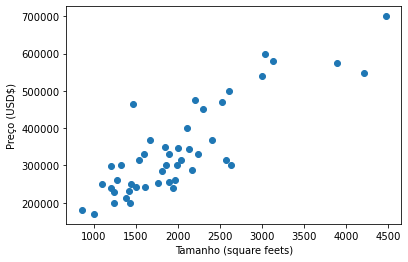

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel("Tamanho (square feets)")
plt.ylabel("Preço (USD$)")

## Medindo a falta de capacidade de generalização de modelos de alto grau

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Vamos agora encaixar uma regressão linear simples

In [4]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(X_train, y_train)

Vamos analizar o valor de $R^2$ na partição de treino e de teste

In [5]:
from sklearn.metrics import r2_score
print(f"Partição de Treino: {regression.score(X_train, y_train)}")
y_pred = regression.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6493635022333737
Partição de Teste: 0.39301821331700204


In [6]:
from sklearn.metrics import mean_squared_error

y_pred = regression.predict(X_test)

print(mean_squared_error(y_test, y_pred))

8380417681.328084


Agora vamos fazer a expansão polinomial de ordem 2

In [7]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

E agora retreinamos o modelo utilizando o `X_poly` expandido e avaliamos a qualidade do mesmo.

In [8]:
regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6564211353485666
Partição de Teste: 0.278347829094135


Não notamos nenhuma melhora significativa no $R^2$ na partição de treino, no entanto notamos uma queda no desempenho na partição de teste.

## Exercício 1 

Avalie a qualidade do modelo nos conjunto de treino e de teste enquanto o grau do polinômio aumenta.

In [11]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6569909895776398
Partição de Teste: 0.29828490472428015


In [12]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6589590917221796
Partição de Teste: 0.25855494666436674


In [13]:
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6626529223268033
Partição de Teste: 0.2784732500146426


In [12]:
poly = PolynomialFeatures(degree = 6)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6678899322620004
Partição de Teste: 0.23261215792387413


In [13]:
poly = PolynomialFeatures(degree = 7)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.6736341672462689
Partição de Teste: 0.13627755911842832


**R**: Com o grau polinomial = 3 foi obtido o melhor resultado.

## Exercício 2

Utilizando o dataset de vendas de abóboras na cidade de Nova Iorque, compare uma regressão linear com regressões polinomiais.

In [18]:
# nyc_pumpkins = pd.read_csv("data/nyc_pumpkins.csv")
dados_pum = pd.read_csv('data/nyc_pumpkins.csv', index_col=None)
X2 = dados_pum.loc[:,['size']]
y2 = dados_pum.loc[:,['price']]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

print(f"Partição de Treino: {regression.score(X_train, y_train)}")
y_pred = regression.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: -602293.5986394043
Partição de Teste: -211026.8033626207


In [19]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X2)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y2, test_size=0.33, random_state=42)

regression2 = LinearRegression().fit(X_train, y_train)
print(f"Partição de Treino: {regression2.score(X_train, y_train)}")

y_pred = regression2.predict(X_test)
print(f"Partição de Teste: {r2_score(y_pred, y_test)}")

Partição de Treino: 0.4288749411744748
Partição de Teste: 0.0673749460255969
